# P2: Investigate a Dataset

Source: 2014 Lahman’s Baseball Database.

Import csv file and transform to Pandas DataFrame.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = 'Salaries.csv'
salariesDF = pd.read_csv(filename)
print salariesDF.head()

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000


Find the distinct team ids from the dataframe.

In [2]:
# Print out distinct teamIDs
teamID = salariesDF["teamID"].unique()
print teamID

['ATL' 'BAL' 'BOS' 'CAL' 'CHA' 'CHN' 'CIN' 'CLE' 'DET' 'HOU' 'KCA' 'LAN'
 'MIN' 'ML4' 'MON' 'NYA' 'NYN' 'OAK' 'PHI' 'PIT' 'SDN' 'SEA' 'SFN' 'SLN'
 'TEX' 'TOR' 'COL' 'FLO' 'ANA' 'ARI' 'MIL' 'TBA' 'LAA' 'WAS' 'MIA' 'NYM'
 'SFG']


Find sum, max, min, mean by team ids.

In [3]:
# Database with two columns: teamID and salary
salariesDF_reduced = salariesDF[["teamID","salary"]]

salariesDF_summary_by_teamID = salariesDF_reduced.groupby("teamID").agg([np.sum,np.max,np.min,np.mean])
salariesDF_summary_by_teamID.columns = ["sum", "max", "min", "mean"]
print salariesDF_summary_by_teamID.head()

               sum       max     min     mean
teamID                                       
ANA      468091973  13166667  150000  1895109
ARI     1209975228  16000000  170000  2499948
ATL     1882946784  16061802   60000  2184393
BAL     1630200038  17000000   60000  1846206
BOS     2432700935  22500000   60000  2755040


In [7]:
def bargraph(column): # column = sum, max, min, mean
	frequency = salariesDF_summary_by_teamID[column].sort_values(axis=0, ascending = False).head(10)
	objects = frequency.index
	y_pos = np.arange(len(objects))
	plt.bar(y_pos, frequency, align='center')
	plt.xticks(y_pos, objects)
	plt.ylabel('Number')
	plt.title("Top 10 {} of salaries by teamID".format(column))
	print "Top 10 {} of salaries by teamID".format(column)
	print frequency
	plt.show()

Change False to True to see the bargraphs.

Top 10 sum of salaries by teamID
teamID
NYA    3283119334
BOS    2432700935
LAN    2237766703
PHI    1982355800
NYN    1965737231
ATL    1882946784
CHN    1859833315
SLN    1775631332
DET    1771197687
CHA    1699865143
Name: sum, dtype: int64


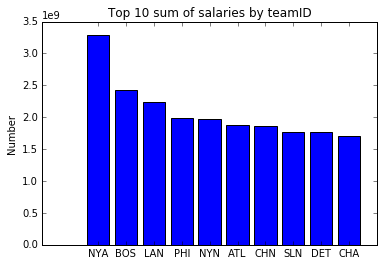

Top 10 max of salaries by teamID
teamID
NYA    33000000
LAA    26187500
LAN    26000000
PHI    25000000
TEX    24000000
SEA    24000000
NYN    23145011
DET    23000000
MIN    23000000
BOS    22500000
Name: max, dtype: int64


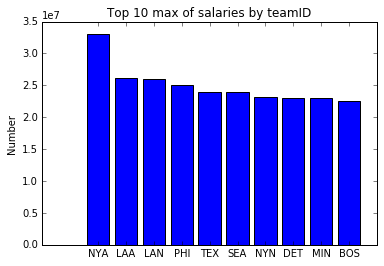

Top 10 min of salaries by teamID
teamID
NYM    501560
SFG    500500
MIA    480000
WAS    316000
LAA    316000
ARI    170000
MIL    170000
TBA    170000
ANA    150000
COL    109000
Name: min, dtype: int64


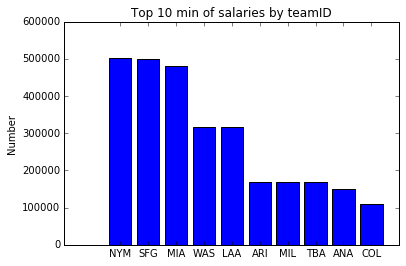

Top 10 mean of salaries by teamID
teamID
SFG    5315191
LAA    4186119
NYA    3735061
BOS    2755040
LAN    2505897
ARI    2499948
MIA    2480984
WAS    2466758
NYN    2345748
NYM    2283624
Name: mean, dtype: int64


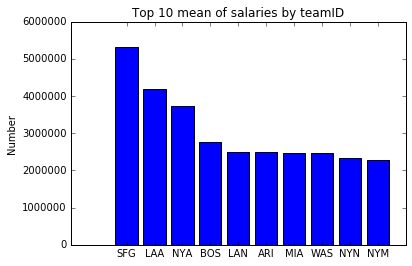

In [9]:
""" Bar graph of the number of players by teamID """
if True:
    %matplotlib inline
    bargraph("sum")
    bargraph("max")
    bargraph("min")
    bargraph("mean")


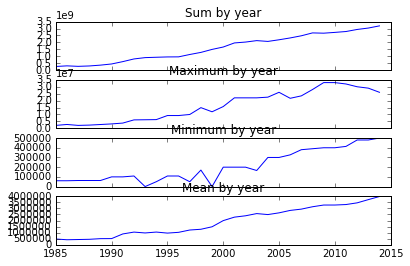

In [10]:
""" data by year """
salariesDF_by_year = salariesDF[["yearID","salary"]].groupby("yearID").agg([np.sum,np.max,np.min,np.mean])
salariesDF_by_year.columns = ["sum", "max", "min", "mean"]

if True:
    %matplotlib inline
    f, axarr = plt.subplots(4, sharex=True)
    axarr[0].set_title('Sum by year')
    axarr[0].plot(salariesDF_by_year.index, salariesDF_by_year["sum"])
    axarr[1].set_title('Maximum by year')
    axarr[1].plot(salariesDF_by_year.index, salariesDF_by_year["max"])
    axarr[2].set_title('Minimum by year')
    axarr[2].plot(salariesDF_by_year.index, salariesDF_by_year["min"])
    axarr[3].set_title('Mean by year')
    axarr[3].plot(salariesDF_by_year.index, salariesDF_by_year["mean"])
    plt.show()

In [11]:
""" Finding maximum year """
maxSalaryByYear = salariesDF_by_year["max"].argmax()
print "\nMaximum salary occurs in {}, $ {}\n".format(maxSalaryByYear, salariesDF_by_year["max"].loc[maxSalaryByYear])


Maximum salary occurs in 2009, $ 33000000



In [12]:
""" Find player with the maximum in 2009 """
maxDFyear = salariesDF[salariesDF["yearID"]==2009]
maxPlayer2009 = maxDFyear[maxDFyear["salary"] == salariesDF_by_year["max"].loc[maxSalaryByYear]]
maxPlayerID = maxPlayer2009["playerID"].values[0]
print maxPlayerID
print "Detailed information of the player"
print maxPlayer2009, "\n"


rodrial01
Detailed information of the player
       yearID teamID lgID   playerID    salary
20286    2009    NYA   AL  rodrial01  33000000 



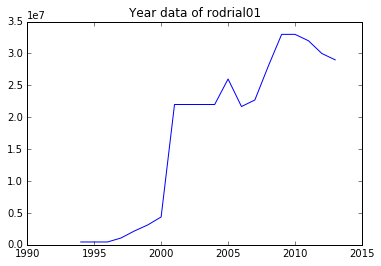

In [13]:
""" maximum player's yearly graph """
maxPlayerDF = salariesDF[salariesDF["playerID"] == maxPlayerID]

if True:
    %matplotlib inline
    plt.plot(maxPlayerDF["yearID"], maxPlayerDF["salary"])
    plt.title("Year data of {}".format(maxPlayerID))
    plt.show()

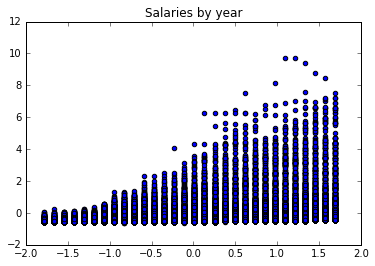

In [15]:
""" Relationship between year and salary """
salaryYearDF = salariesDF[["yearID","salary"]]

def standard(sr):
    return (sr - sr.mean())/sr.std(ddof=0)

standardizedDF = salaryYearDF.apply(standard)

if True:
    %matplotlib inline
    plt.scatter(standardizedDF["yearID"], standardizedDF["salary"])
    plt.title("Salaries by year")
    plt.show()

In [16]:
""" Calculating correlation """
correlation = (standardizedDF["yearID"] * standardizedDF["salary"]).mean()
print "Correlation between salaries and year:",correlation

Correlation between salaries and year: 0.345339080873


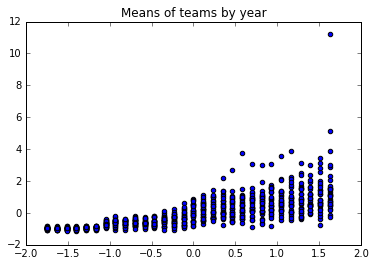

In [17]:
""" Relationship between year and salary """
salaryYearDF = salariesDF[["yearID","teamID","salary"]].groupby(["yearID","teamID"]).mean()

x = salaryYearDF.index.values
x = np.array(map(lambda x: int(x[0]), x))

y = salaryYearDF.values.reshape(1, len(salaryYearDF.values))[0]

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

if True:
    %matplotlib inline
    plt.scatter(x,y)
    plt.title("Means of teams by year")
    plt.show()

In [18]:
""" Calculating correlation """
correlation = (x * y).mean()
print "Correlation between mean salaries by team and year:", correlation


Correlation between mean salaries by team and year: 0.725273264404


In [19]:
""" Find the country with the maximum mean in 2014 """
salaryYearDF = pd.DataFrame((salaryYearDF.index.values), index =np.array(range(len(salaryYearDF))), columns = ["mean"])

salaryYearDFyear = salaryYearDF["mean"].map(lambda x: x[0])
salaryYearDFteam = salaryYearDF["mean"].map(lambda x: x[1])
salaryYearDFsalary = pd.DataFrame(y, index =np.array(range(len(salaryYearDF))), columns = ["mean"])

maxidxSalary2014 = salaryYearDFsalary[salaryYearDFyear == 2014].idxmax()
maxTeam2014 = salaryYearDFteam[maxidxSalary2014.values[0]]
print "Team of maximum mean in 2014:", maxTeam2014


Team of maximum mean in 2014: SFN
